<a href="https://colab.research.google.com/github/JoelmirDias/IBM_Coursera/blob/main/Interpretable_Machine_Learning_Applications_Part_3_Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install aix360

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58.3 MB 1.9 MB/s 
     |████████████████████████████████| 275 kB 59.8 MB/s 
     |████████████████████████████████| 109.7 MB 11 kB/s 
     |████████████████████████████████| 264 kB 69.6 MB/s 
     |████████████████████████████████| 377 kB 56.9 MB/s 
     |████████████████████████████████| 109.3 MB 54 kB/s 
     |████████████████████████████████| 41 kB 390 kB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 488 kB 72.1 MB/s 
     |████████████████████████████████| 3.1 MB 37.1 MB/s 
     |████████████████████████████████| 7.9 MB 23.2 MB/s 
  Created wheel for lime: filename=lime-0.1.1.37-py3-none-any.whl size=284290 sha256=37863594eef9bee3b5cf1a45003205e5ed780f76d1ae180bb7be758837358df0
  Stored in directory: /root/.cache/pip/wheels/5d/7a/8d/30e0ea15164fb80d5484e83ab991e188d6a9d8febfada307a6
  Created 

In [ ]:
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from keras.models import Sequential, Model, load_model, model_from_json
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

In [ ]:
from aix360.algorithms.contrastive import CEMExplainer, KerasClassifier
from aix360.algorithms.protodash import ProtodashExplainer
from aix360.datasets.heloc_dataset import HELOCDataset

In [ ]:
#arquivo heloc_dataset.csv precisa estar em /usr/local/lib/python3.7/dist-packages/aix360/data/heloc_data/heloc_dataset.csv
heloc=HELOCDataset()
df=heloc.dataframe()
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',24)
pd.set_option('display.width',1000)

Using Heloc dataset:  /usr/local/lib/python3.7/dist-packages/aix360/datasets/../data/heloc_data/heloc_dataset.csv


In [ ]:
df.head().transpose()

,0,1,2,3,4
ExternalRiskEstimate,55,61,67,66,81
MSinceOldestTradeOpen,144,58,66,169,333
MSinceMostRecentTradeOpen,4,15,5,1,27
AverageMInFile,84,41,24,73,132
NumSatisfactoryTrades,20,2,9,28,12
NumTrades60Ever2DerogPubRec,3,4,0,1,0
NumTrades90Ever2DerogPubRec,0,4,0,1,0
PercentTradesNeverDelq,83,100,100,93,100
MSinceMostRecentDelq,2,-7,-7,76,-7
MaxDelq2PublicRecLast12M,3,0,7,6,7


In [ ]:
print("Size of HELOC dataset:", df.shape)
print("Number of \"Good\" applicants:", np.sum(df['RiskPerformance']=='Good'))
print("Number of \"Bad\" applicants:", np.sum(df['RiskPerformance']=='Bad'))


Size of HELOC dataset: (10459, 24)
Number of "Good" applicants: 5000
Number of "Bad" applicants: 5459


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5800694610>]],
      dtype=object)

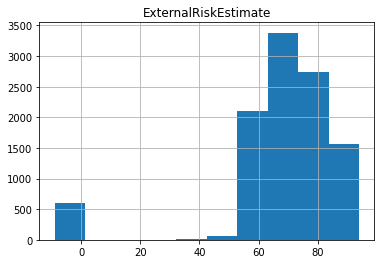

In [ ]:
df.hist(column=['ExternalRiskEstimate'], bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58006bbb90>]],
      dtype=object)

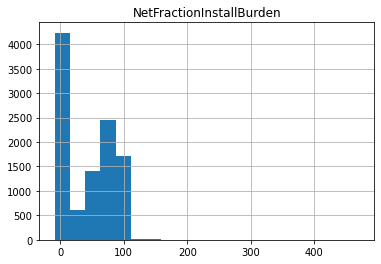

In [ ]:
df.hist(column=['NetFractionInstallBurden'], bins=20)

In [ ]:
(Data, x_train, x_test, y_train_b, y_test_b)=heloc.split()

In [ ]:
Z=np.vstack((x_train, x_test))
Zmax=np.max(Z, axis=0)
Zmin=np.min(Z, axis=0)

In [ ]:
def normalize(V):
  VN=(V-Zmin)/(Zmax-Zmin)
  VN=VN-0.5
  return(VN)

In [ ]:
print(normalize(x_train[0:1]))

[[ 0.18085106 -0.28206725 -0.4843342  -0.25461741 -0.13291139 -0.02631579
  -0.02631579  0.13       -0.47590361 -0.05555556 -0.16666667 -0.10576923
  -0.44736842  0.13       -0.5        -0.48484848 -0.48484848 -0.43103448
  -0.30042463 -0.46875    -0.45652174 -0.5         0.        ]]


In [ ]:
N=normalize(Z)
xn_train=N[0:x_train.shape[0],:]
xn_test=N[x_train.shape[0]:,:]

In [ ]:
def nn_small():
  model=Sequential()
  model.add(Dense(10, input_dim=23, kernel_initializer='normal',activation='relu'))
  model.add(Dense(2, kernel_initializer='normal'))
  return model

In [ ]:
np.random.seed(1)
tf.set_random_seed(2)

class_names=['Bad','Good']

In [ ]:
def fn(correct, predicted):
  return tf.nn.softmax_cross_entropy_with_logits(labels=correct, logits=predicted)

In [ ]:
nn=nn_small()
nn.compile(loss=fn, optimizer='adam', metrics=['accuracy'])
nn.summary()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 262
Trainable params: 262
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn.fit(xn_train, y_train_b, batch_size=128, epochs=500, verbose=1, shuffle=False)


Epoch 1/500
7403/7403 [==============================] - 0s 32us/step - loss: 0.6878 - accuracy: 0.5340
Epoch 2/500
7403/7403 [==============================] - 0s 13us/step - loss: 0.6638 - accuracy: 0.6416
Epoch 3/500
7403/7403 [==============================] - 0s 11us/step - loss: 0.6240 - accuracy: 0.6996
Epoch 4/500
7403/7403 [==============================] - 0s 9us/step - loss: 0.5929 - accuracy: 0.7094
Epoch 5/500
7403/7403 [==============================] - 0s 10us/step - loss: 0.5765 - accuracy: 0.7131
Epoch 6/500
7403/7403 [==============================] - 0s 11us/step - loss: 0.5679 - accuracy: 0.7196
Epoch 7/500
7403/7403 [==============================] - 0s 9us/step - loss: 0.5626 - accuracy: 0.7219
Epoch 8/500
7403/7403 [==============================] - 0s 9us/step - loss: 0.5591 - accuracy: 0.7252
Epoch 9/500
7403/7403 [==============================] - 0s 11us/step - loss: 0.5566 - accuracy: 0.7248
Epoch 10/500
7403/7403 [==============================] - 0s 9us/s

In [ ]:
score=nn.evaluate(xn_test,y_test_b,verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7204213738441467


In [ ]:
p_test=nn.predict_classes(xn_test)
p_test=p_test.reshape((p_test.shape[0],1))

In [ ]:
z_test=np.hstack((xn_test, p_test))
z_test_good = z_test[z_test[:,-1]==1,:]

In [ ]:
print(p_test[8])

[1]


In [ ]:
z_test_good[8]

array([ 0.43617021, -0.24470735, -0.47911227, -0.14643799, -0.03164557,
       -0.5       , -0.5       ,  0.5       , -0.5       ,  0.27777778,
        0.5       , -0.42307692, -0.44736842, -0.39      ,  0.29166667,
       -0.5       , -0.5       , -0.49137931, -0.5       , -0.375     ,
       -0.45652174, -0.5       , -0.26      ,  1.        ])

In [ ]:
#desnormalizando
zun_test = np.hstack((x_test, p_test))

#Estudo sobre as avaliações "Good"
zun_test_good=zun_test[zun_test[:,-1]==1,:]

In [ ]:
#Início da avaliação
idx=8

X=xn_test[idx].reshape((1,) + xn_test[idx].shape)

#anexar a predição feita ao X
X=np.hstack((X, nn.predict_classes(X).reshape((1,1))))

In [ ]:
explainer=ProtodashExplainer()
(W, S, setValues) = explainer.explain(X, z_test_good, m=5) # peso W, protótipo S e objetivo

In [ ]:
dfs = pd.DataFrame.from_records(zun_test_good[S, 0:-1].astype('double'))
RP=[]
for i in range(S.shape[0]):
  RP.append(class_names[int(z_test_good[S[i],-1])]) #Adiciona os nomes das classes
dfs[23]=RP
dfs.columns=df.columns
dfs['Weight']=np.around(W,5)/np.sum(np.around(W,5)) #Calcula a importancia do peso normalizado
dfs.transpose()

,0,1,2,3,4
ExternalRiskEstimate,82.0,86.0,78.0,72.0,89.0
MSinceOldestTradeOpen,280.0,315.0,238.0,88.0,474.0
MSinceMostRecentTradeOpen,13.0,16.0,40.0,8.0,49.0
AverageMInFile,102.0,102.0,148.0,70.0,184.0
NumSatisfactoryTrades,22.0,18.0,31.0,19.0,8.0
NumTrades60Ever2DerogPubRec,0.0,1.0,0.0,2.0,0.0
NumTrades90Ever2DerogPubRec,0.0,0.0,0.0,2.0,0.0
PercentTradesNeverDelq,91.0,95.0,100.0,95.0,100.0
MSinceMostRecentDelq,26.0,64.0,0.0,49.0,0.0
MaxDelq2PublicRecLast12M,6.0,6.0,7.0,6.0,7.0


In [ ]:
#Estudo sobre as avaliações "Bad"
z_test_bad = z_test[z_test[:,-1]==0,:]
zun_test_bad=zun_test[zun_test[:,-1]==0,:]

In [ ]:
#Início da avaliação
idx=8

X=xn_test[idx].reshape((1,) + xn_test[idx].shape)

#anexar a predição feita ao X
X=np.hstack((X, nn.predict_classes(X).reshape((1,1))))

In [ ]:
explainer=ProtodashExplainer()
(W, S, setValues) = explainer.explain(X, z_test_bad, m=5) # peso W, protótipo S e objetivo

In [ ]:
dfs = pd.DataFrame.from_records(zun_test_bad[S, 0:-1].astype('double'))
RP=[]
for i in range(S.shape[0]):
  RP.append(class_names[int(z_test_bad[S[i],-1])]) #Adiciona os nomes das classes
dfs[23]=RP
dfs.columns=df.columns
dfs['Weight']=np.around(W,5)/np.sum(np.around(W,5)) #Calcula a importancia do peso normalizado
dfs.transpose()

,0,1,2,3,4
ExternalRiskEstimate,71.0,67.0,72.0,69.0,64.0
MSinceOldestTradeOpen,291.0,135.0,111.0,390.0,314.0
MSinceMostRecentTradeOpen,21.0,0.0,111.0,3.0,4.0
AverageMInFile,108.0,71.0,111.0,100.0,94.0
NumSatisfactoryTrades,23.0,29.0,1.0,18.0,64.0
NumTrades60Ever2DerogPubRec,0.0,0.0,1.0,3.0,0.0
NumTrades90Ever2DerogPubRec,0.0,0.0,0.0,1.0,0.0
PercentTradesNeverDelq,96.0,94.0,0.0,67.0,100.0
MSinceMostRecentDelq,14.0,80.0,19.0,3.0,0.0
MaxDelq2PublicRecLast12M,6.0,6.0,6.0,4.0,7.0


In [ ]:
#Cálculo deu errado.. Verificar depois
z=z_test_bad[S,0:-1] # Armazena os protótipos
eps=1e-10 #Constante para evitar divisão por 0
fwt=np.zeros(z.shape)
for i in range(z.shape[0]):
  for j in range(z.shape[1]):
    fwt[i,j]=np.exp(-1*abs(X[0,j]-z[i,j]))/(np.std(z[:,j])+eps)

#mover o fwt para um dataframe
dfw=pd.DataFrame.from_records(np.around(fwt.astype('double'),2))
dfw.columns=df.columns[:-1]
dfw.transpose()

,0,1,2,3,4
ExternalRiskEstimate,29.13,27.92,29.44,28.52,27.04
MSinceOldestTradeOpen,7.36,6.23,6.05,6.51,7.15
MSinceMostRecentTradeOpen,8.88,8.76,7.02,8.83,8.86
AverageMInFile,26.24,24.56,26.03,26.52,26.10
NumSatisfactoryTrades,3.77,3.49,2.92,3.62,2.24
NumTrades60Ever2DerogPubRec,16.29,16.29,15.46,13.91,16.29
NumTrades90Ever2DerogPubRec,47.50,47.50,47.50,45.06,47.50
PercentTradesNeverDelq,2.53,2.58,1.07,2.09,2.43
MSinceMostRecentDelq,2.46,1.48,2.61,2.15,2.08
MaxDelq2PublicRecLast12M,9.19,9.19,9.19,7.36,8.22


In [ ]:
#Teste de variaveis que poderiam modificar a classificação:

idx=20 #caso a ser avaliado

X=xn_test[idx].reshape((1,)+xn_test[idx].shape)
print("Calculando PN para a amostra ",idx)
print("Predição feita pelo modelo ",nn.predict_proba(X))
print("Probabilidade predita: ",class_names[np.argmax(nn.predict_proba(X))])
print("")

mymodel = KerasClassifier(nn)
explainer=CEMExplainer(mymodel)

arg_mode = 'PN' # Encontrar Pertinent Negatives
arg_max_iter = 1000
arg_init_const= 10.0
arg_b=9 #Número de atualizações para os coeficientes do termo main loss
arg_kappa=0.2 #Mínimo intervalo de confiança
arg_beta=1e-1 #Controla sparsity da solução
arg_gamma= 100 #Controla aderência
my_AE_model= None # Apontador do Auto-Encoder
arg_alpha=0.01 # Penalizador
arg_threshold = 1
arg_offset = 0.5

(adv_pn, delta_pn, info_pn)=explainer.explain_instance(X, arg_mode, my_AE_model, arg_kappa, arg_b, 
                                                       arg_max_iter, arg_init_const, arg_beta, arg_gamma, 
                                                       arg_alpha, arg_threshold, arg_offset)

Calculando PN para a amostra  20
Predição feita pelo modelo  [[-0.2717616   0.38639238]]
Probabilidade predita:  Good




Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


iter:0 const:[10.]
Loss_Overall:0.2162, Loss_Attack:0.0000
Loss_L2Dist:0.1287, Loss_L1Dist:0.8751, AE_loss:0.0
target_lab_score:-0.7179, max_nontarget_lab_score:0.7858

iter:500 const:[10.]
Loss_Overall:0.2461, Loss_Attack:0.1801
Loss_L2Dist:0.0366, Loss_L1Dist:0.2940, AE_loss:0.0
target_lab_score:-0.0428, max_nontarget_lab_score:0.1392

iter:0 const:[5.]
Loss_Overall:2.6080, Loss_Attack:2.5910
Loss_L2Dist:0.0045, Loss_L1Dist:0.1245, AE_loss:0.0
target_lab_score:0.2126, max_nontarget_lab_score:-0.1056

iter:500 const:[5.]
Loss_Overall:2.5727, Loss_Attack:2.5487
Loss_L2Dist:0.0127, Loss_L1Dist:0.1128, AE_loss:0.0
target_lab_score:0.2089, max_nontarget_lab_score:-0.1009

iter:0 const:[2.5]
Loss_Overall:2.1454, Loss_Attack:2.1454
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:0.3864, max_nontarget_lab_score:-0.2718

iter:500 const:[2.5]
Loss_Overall:2.1454, Loss_Attack:2.1454
Loss_L2Dist:0.0000, Loss_L1Dist:0.0000, AE_loss:0.0
target_lab_score:0.3864, max_nontarget_l